# IBM Capstone Project - The Battle of Neighborhoods

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
!pip install geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder #to get coordinates

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


# IBM Capstone Project - The Battle of Neighborhoods

## Launch of a network of fitness clubs in Saint Petersburg

## Introduction

Saint Petersburg is a large city in Russia. A healthy lifestyle is becoming more and more popular among residents of Saint Petersburg. Residents want to play sports, but there are not many places for this. There is a lack of sports clubs in the city.

Investors plan to open a network of sports clubs in St. Petersburg. To do this, they need to find out the most favorable points for placing clubs in the new network. The main mode of transport in the city is the metro, so you need to understand at which metro stations there is a high density of sports clubs, at which stations there is a shortage of sports clubs and at which stations residents are eager to open a gym.

A very important point is the number of available places for opening clubs. Investors believe that to maintain the profitability of the network, it is necessary to open at least seven clubs in different parts of the city. It is necessary to check whether the necessary number of places for new gyms is available.

## Data 


To solve the problem we will use the following data: 
-	list of Saint Petersburg metro stations
-	latitude and longitude coordinates of stations
-	foursquare venue data, especially data about gyms, sport clubs.

Sourses:
https://en.wikipedia.org/wiki/List_of_Saint_Petersburg_Metro_stations - Wikipedia page with list of Saint Petersburg Metro stations.
The Saint Petersburg Metro is a rapid transit system in Saint Petersburg and Leningrad Oblast, Russia. It has been open since 15 November 1955. The network currently consists of 5 lines with a total length of 124 kilometres (77 mi). It has 72 stations including 7 transfer points.
Latitude and longitude coordinates of stations are taken from parsing by python geocoder library.
Foursquare venue data were taken from location-based service Foursquare API.


## Methodology

-	Data were collected from Wikipedia, cleaned, and processed into dataframe by pandas.
-	Latitude and longitude coordinates of stations were taken from parsing by python geocoder library.
-	Foursquare venue data about gyms were taken from location-based service Foursquare API.
-	Data were sorted and clustered by k-means method by sklearn library.
-	Moreover, data were visualized by python folium library.


Steps of analysis:

 1. Build a dataframe of metro stations of Saint-P by web scraping the data from Wikipedia page
 2. Get the geographical coordinates of the stations
 3. Obtain the venue data for the neighborhoods around the stations from Foursquare API
 4. Explore and cluster the neighborhoods
 5. Select the best cluster to open a new fitness clubs

### Build a dataframe of metro stations of Saint-P by web scraping the data from Wikipedia page

In [61]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_Saint_Petersburg_Metro_stations")[0]
df.drop(columns=['Int.1','Int.2','See also','Pic.'],inplace=True)
df['metro'] = 'Метро ' + df['Russian']
df

,English,Russian,Line,Openingdate,Depth(metre),metro
0,Devyatkino,Девяткино,M1,1978-12-29,A,Метро Девяткино
1,Grazhdansky Prospekt,Гражданский проспект,M1,1978-12-29,64,Метро Гражданский проспект
2,Akademicheskaya,Академическая,M1,1975-12-31,64,Метро Академическая
3,Politekhnicheskaya,Политехническая,M1,1975-12-31,65,Метро Политехническая
4,Ploschad Muzhestva,Площадь Мужества,M1,1975-12-31,67,Метро Площадь Мужества
5,Lesnaya,Лесная,M1,1975-04-22,64,Метро Лесная
6,Vyborgskaya,Выборгская,M1,1975-04-22,67,Метро Выборгская
7,Ploshchad Lenina,Площадь Ленина,M1,1958-06-01,71,Метро Площадь Ленина
8,Chernyshevskaya,Чернышевская,M1,1958-09-01,70,Метро Чернышевская
9,Ploshchad Vosstaniya,Площадь Восстания,M1,1955-11-15,58,Метро Площадь Восстания


In [62]:
print('So, we have {} metro stations in Saint-Petersburg'.format(df.shape[0]))

So, we have 72 metro stations in Saint-Petersburg


### Get the geographical coordinates of the stations

In [63]:
address = 'Saint Petersburg'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Saint Petersburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Saint Petersburg are 59.9606739, 30.1586551.


In [64]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Санкт-Петербург'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [65]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [get_latlng(neighborhood) for neighborhood in df['metro'].tolist()]

coords

[[59.948550022217056, 30.2349200455879],
 [60.03501000000006, 30.419550000000072],
 [60.01262000000003, 30.397250000000042],
 [60.00895000000003, 30.369530000000054],
 [59.99974000000003, 30.36531000000008],
 [59.98515000000003, 30.34409000000005],
 [59.97109000000006, 30.348110000000077],
 [59.95524000000006, 30.355670000000032],
 [59.94469000000004, 30.35940000000005],
 [59.93112000000008, 30.360340000000065],
 [59.92765000000003, 30.34740000000005],
 [59.92085000000003, 30.329390000000046],
 [59.91647000000006, 30.31809000000004],
 [59.907620000000065, 30.298830000000066],
 [59.90093000000007, 30.27431000000007],
 [59.88003000000003, 30.26135000000005],
 [59.86749000000003, 30.260640000000024],
 [59.851950000000045, 30.267330000000072],
 [59.84159000000005, 30.253790000000038],
 [60.06726000000003, 30.33433000000008],
 [60.05155000000008, 30.333250000000078],
 [60.037240000000054, 30.32307000000003],
 [60.016950000000065, 30.314940000000036],
 [60.002770000000055, 30.297800000000052

In [66]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [67]:
df.head(1)

,English,Russian,Line,Openingdate,Depth(metre),metro,Latitude,Longitude
0,Devyatkino,Девяткино,M1,1978-12-29,A,Метро Девяткино,59.94855,30.23492


In [69]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Line'], df['English']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Obtain the venue data for the neighborhoods around the stations from Foursquare API

In [71]:
CLIENT_ID = '3LDC3HXBDDRAPSZWKKIE1VZVRGY5H2RSUNAKLMZUHNEVCTWL' # your Foursquare ID
CLIENT_SECRET = 'TC0ACXN3SXLM0DCXX4E3B10KBVSKVGFVDDMJ5MLRYZYKTGXU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3LDC3HXBDDRAPSZWKKIE1VZVRGY5H2RSUNAKLMZUHNEVCTWL
CLIENT_SECRET:TC0ACXN3SXLM0DCXX4E3B10KBVSKVGFVDDMJ5MLRYZYKTGXU


In [72]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    LIMIT = 100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [73]:
spb_venues = getNearbyVenues(names=df['English'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Devyatkino
Grazhdansky Prospekt
Akademicheskaya
Politekhnicheskaya
Ploschad Muzhestva
Lesnaya
Vyborgskaya
Ploshchad Lenina
Chernyshevskaya
Ploshchad Vosstaniya
Vladimirskaya
Pushkinskaya
Tekhnologichesky Institut
Baltiyskaya
Narvskaya
Kirovsky Zavod
Avtovo
Leninsky Prospekt
Prospekt Veteranov
Parnas
Prospect Prosvesheniya
Ozerki
Udelnaya
Pionerskaya
Chyornaya Rechka
Petrogradskaya
Gorkovskaya
Nevsky Prospekt
Sennaya Ploschad
Tekhnologichesky Institut
Frunzenskaya
Moskovskiye Vorota
Elektrosila
Park Pobedy
Moskovskaya
Zvyozdnaya
Kupchino
Begovaya
Novokrestovskaya
Primorskaya
Vasileostrovskaya
Gostiny Dvor
Mayakovskaya
Ploshchad Alexandra Nevskogo I
Yelizarovskaya
Lomonosovskaya
Proletraskaya
Obukhovo
Rybatskoye
Spasskaya
Dostoevskaya
Ligovsky Prospekt
Ploshchad Alexandra Nevskogo II
Novocherkasskaya
Ladozhskaya
Prospekt Bolshevikov
Ulitsa Dybenko
Komendantsky Prospekt
Staraya Derevnya
Krestovsky Ostrov
Chkalovskaya
Sportivnaya
Admiralteyskaya
Sadovaya
Zvenigorodskaya
Obvodny Kanal
Volko

In [74]:
print(spb_venues.shape)
spb_venues.head()

(3176, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Devyatkino,59.94855,30.23492,Coffee Bon,59.949662,30.232457,Coffee Shop
1,Devyatkino,59.94855,30.23492,ЛюдиЛюбят,59.949019,30.234729,Bakery
2,Devyatkino,59.94855,30.23492,Подружка,59.949121,30.234532,Cosmetics Shop
3,Devyatkino,59.94855,30.23492,RiverSide Pub&Grill,59.948130,30.233880,Gastropub
4,Devyatkino,59.94855,30.23492,Академия танца Яны Дынько,59.949096,30.233492,Dance Studio


In [76]:
spb_venues['Venue Category'].unique()

array(['Coffee Shop', 'Bakery', 'Cosmetics Shop', 'Gastropub',
       'Dance Studio', 'Chinese Restaurant', 'Flower Shop', 'Park',
       'Italian Restaurant', 'Arts & Crafts Store', 'Doner Restaurant',
       'Pet Store', 'Soccer Field', 'Pharmacy', 'Mobile Phone Shop',
       'Gym / Fitness Center', 'Electronics Store', 'Food & Drink Shop',
       'Baby Store', 'Sushi Restaurant', 'Dessert Shop', 'Bookstore',
       'Blini House', 'BBQ Joint', 'Japanese Restaurant',
       'History Museum', 'Supermarket', 'Wine Shop', 'Clothing Store',
       'Farmers Market', 'Strip Club', 'Turkish Restaurant', 'Café',
       'Pier', 'Bed & Breakfast', 'Hotel', 'Athletics & Sports',
       'Hookah Bar', 'Cupcake Shop', 'Pie Shop', 'Gift Shop', 'Theater',
       'Sports Club', 'Supplement Shop', 'Smoke Shop', 'Playground',
       "Women's Store", 'Sporting Goods Shop', 'Lingerie Store',
       'Pizza Place', 'Gourmet Shop', 'Spa', 'Vietnamese Restaurant',
       'Burger Joint', 'Middle Eastern Restau

So we have such category as 'Gym / Fitness Center'. That what we need.

In [77]:
spb_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Admiralteyskaya,99,99,99,99,99,99
Akademicheskaya,36,36,36,36,36,36
Avtovo,26,26,26,26,26,26
Baltiyskaya,25,25,25,25,25,25
Begovaya,45,45,45,45,45,45
Bukharestskaya,42,42,42,42,42,42
Chernyshevskaya,47,47,47,47,47,47
Chkalovskaya,32,32,32,32,32,32
Chyornaya Rechka,32,32,32,32,32,32


In [78]:
print('There are {} uniques categories.'.format(len(spb_venues['Venue Category'].unique())))

There are 301 uniques categories.


In [79]:
# one hot encoding
spb_onehot = pd.get_dummies(spb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
spb_onehot['Neighborhood'] = spb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [spb_onehot.columns[-1]] + list(spb_onehot.columns[:-1])
spb_onehot = spb_onehot[fixed_columns]

spb_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Blini House,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cable Car,Cafeteria,Café,Camera Store,Canal,Candy Store,Car Wash,Caucasian Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Spot,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Financial or Legal Service,Fish Market,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laser Tag,Latin American Restaurant,Laundry Service,Lighting Store,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Notary,Office,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Perfume Shop,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Piercing Parlor,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Roller Rink,Roof Deck,Rugby Pitch,Russian Restaurant,Salon / Barbershop,Salsa Club,Sandwich Place,Sauna / Steam Room,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Tailor Shop,Takoyaki Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Travel Agency,Tunnel,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaur

In [80]:
spb_onehot.shape

(3176, 302)

In [81]:
spb_grouped = spb_onehot.groupby('Neighborhood').mean().reset_index()
spb_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Blini House,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cable Car,Cafeteria,Café,Camera Store,Canal,Candy Store,Car Wash,Caucasian Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Spot,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Financial or Legal Service,Fish Market,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laser Tag,Latin American Restaurant,Laundry Service,Lighting Store,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Notary,Office,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Perfume Shop,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Piercing Parlor,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Roller Rink,Roof Deck,Rugby Pitch,Russian Restaurant,Salon / Barbershop,Salsa Club,Sandwich Place,Sauna / Steam Room,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Tailor Shop,Takoyaki Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Travel Agency,Tunnel,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaur

In [82]:
spb_grouped.shape

(71, 302)

### Explore and cluster the neighborhoods

In [84]:
# filter column 'Gym / Fitness Center' for the stations that have gymss nearby

gyms = spb_onehot.loc[spb_onehot['Gym / Fitness Center'] > 0]
neighborhoods_with_gyms = gyms['Neighborhood'].unique()

print('There are {} unique Neighborhoods with gyms. \n'.format(len(neighborhoods_with_gyms)))
neighborhoods_with_gyms

There are 41 unique Neighborhoods with gyms. 



array(['Devyatkino', 'Grazhdansky Prospekt', 'Akademicheskaya',
       'Ploschad Muzhestva', 'Vladimirskaya', 'Pushkinskaya',
       'Baltiyskaya', 'Kirovsky Zavod', 'Avtovo', 'Leninsky Prospekt',
       'Prospekt Veteranov', 'Parnas', 'Ozerki', 'Petrogradskaya',
       'Gorkovskaya', 'Nevsky Prospekt', 'Sennaya Ploschad',
       'Frunzenskaya', 'Zvyozdnaya', 'Kupchino', 'Begovaya',
       'Primorskaya', 'Vasileostrovskaya', 'Gostiny Dvor', 'Mayakovskaya',
       'Ploshchad Alexandra Nevskogo I', 'Proletraskaya', 'Rybatskoye',
       'Spasskaya', 'Dostoevskaya', 'Ploshchad Alexandra Nevskogo II',
       'Ladozhskaya', 'Prospekt Bolshevikov', 'Komendantsky Prospekt',
       'Staraya Derevnya', 'Krestovsky Ostrov', 'Admiralteyskaya',
       'Sadovaya', 'Obvodny Kanal', 'Mezhdunarodnaya', 'Dunayskaya'],
      dtype=object)

In [85]:
#Create a new DataFrame for Gyms data only
spb_gyms = spb_grouped[["Neighborhood","Gym / Fitness Center"]]
spb_gyms

,Neighborhood,Gym / Fitness Center
0,Admiralteyskaya,0.010101
1,Akademicheskaya,0.055556
2,Avtovo,0.038462
3,Baltiyskaya,0.080000
4,Begovaya,0.022222
5,Bukharestskaya,0.000000
6,Chernyshevskaya,0.000000
7,Chkalovskaya,0.000000
8,Chyornaya Rechka,0.000000
9,Devyatkino,0.051724


Cluster Neighborhoods

In [158]:
# set number of clusters
kclusters = 3

spb_grouped_clustering = spb_gyms.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(spb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 2, 2, 0, 0, 0, 0, 2])

In [159]:
spb_gyms["Cluster Labels"] = kmeans.labels_

C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [160]:
spb_merged = df
spb_merged.rename(columns={'English':'Neighborhood'}, inplace=True)
spb_merged = spb_gyms.merge(spb_merged.iloc[:,[0,6,7]])
print(spb_merged.shape)
spb_merged.head() # check the last columns!

(72, 5)


,Neighborhood,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
0,Admiralteyskaya,0.010101,1,59.93632,30.31482
1,Akademicheskaya,0.055556,2,60.01262,30.39725
2,Avtovo,0.038462,2,59.86749,30.26064
3,Baltiyskaya,0.080000,2,59.90762,30.29883
4,Begovaya,0.022222,2,59.98622,30.20472


In [161]:
# sort the results by Cluster Labels
print(spb_merged.shape)
spb_merged.sort_values(["Cluster Labels"], inplace=True)
spb_merged

(72, 5)


,Neighborhood,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
24,Ligovsky Prospekt,0.000000,0,59.920910,30.354450
30,Narvskaya,0.000000,0,59.900930,30.274310
29,Moskovskiye Vorota,0.000000,0,59.891700,30.318810
28,Moskovskaya,0.000000,0,59.849360,30.321800
34,Obukhovo,0.000000,0,59.848460,30.458270
70,Zvenigorodskaya,0.000000,0,59.922500,30.336170
25,Lomonosovskaya,0.000000,0,59.877390,30.442720
49,Prospect Prosvesheniya,0.000000,0,60.051550,30.333250
23,Lesnaya,0.000000,0,59.985150,30.344090
57,Shushary,0.000000,0,59.809680,30.378950


In [162]:
spb_merged['Cluster Labels'] = spb_merged['Cluster Labels'].astype('int')

In [163]:
spb_merged['Cluster Labels'].unique()

array([0, 1, 2], dtype=int64)

In [164]:
# create map
map_clusters = folium.Map(location=[latitude, longitude	], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(spb_merged['Latitude'], spb_merged['Longitude'], spb_merged['Neighborhood'], spb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##  Examine Clusters

In [178]:
spb_merged.iloc[:,[0,3,4]]

,Neighborhood,Latitude,Longitude
24,Ligovsky Prospekt,59.920910,30.354450
30,Narvskaya,59.900930,30.274310
29,Moskovskiye Vorota,59.891700,30.318810
28,Moskovskaya,59.849360,30.321800
34,Obukhovo,59.848460,30.458270
70,Zvenigorodskaya,59.922500,30.336170
25,Lomonosovskaya,59.877390,30.442720
49,Prospect Prosvesheniya,60.051550,30.333250
23,Lesnaya,59.985150,30.344090
57,Shushary,59.809680,30.378950


#### Cluster 1

In [165]:
spb_merged[spb_merged['Cluster Labels'] == 0]

,Neighborhood,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
24,Ligovsky Prospekt,0.0,0,59.920910,30.354450
30,Narvskaya,0.0,0,59.900930,30.274310
29,Moskovskiye Vorota,0.0,0,59.891700,30.318810
28,Moskovskaya,0.0,0,59.849360,30.321800
34,Obukhovo,0.0,0,59.848460,30.458270
70,Zvenigorodskaya,0.0,0,59.922500,30.336170
25,Lomonosovskaya,0.0,0,59.877390,30.442720
49,Prospect Prosvesheniya,0.0,0,60.051550,30.333250
23,Lesnaya,0.0,0,59.985150,30.344090
57,Shushary,0.0,0,59.809680,30.378950


#### Cluster 2

In [166]:
spb_merged[spb_merged['Cluster Labels'] == 1]

,Neighborhood,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
36,Ozerki,0.015152,1,60.03724,30.32307
39,Petrogradskaya,0.011765,1,59.96609,30.31126
0,Admiralteyskaya,0.010101,1,59.93632,30.31482
55,Sadovaya,0.012346,1,59.92704,30.31710
26,Mayakovskaya,0.011236,1,59.93179,30.35493
56,Sennaya Ploschad,0.012500,1,59.92718,30.32016
58,Spasskaya,0.012346,1,59.92693,30.31972
16,Grazhdansky Prospekt,0.117647,1,60.03501,30.41955
15,Gostiny Dvor,0.010000,1,59.93435,30.33420
14,Gorkovskaya,0.013889,1,59.95663,30.31917


#### Cluster 3

In [167]:
spb_merged[spb_merged['Cluster Labels'] == 2]

,Neighborhood,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
53,Pushkinskaya,0.022222,2,59.92085,30.32939
60,Staraya Derevnya,0.052632,2,59.98987,30.25461
52,Prospekt Veteranov,0.041667,2,59.84159,30.25379
50,Prospekt Bolshevikov,0.033333,2,59.91924,30.46760
65,Vasileostrovskaya,0.023256,2,59.94298,30.27808
66,Vladimirskaya,0.020000,2,59.92765,30.34740
54,Rybatskoye,0.055556,2,59.83191,30.50196
35,Obvodny Kanal,0.034483,2,59.91459,30.34996
43,Ploshchad Alexandra Nevskogo II,0.028571,2,59.92394,30.38620
1,Akademicheskaya,0.055556,2,60.01262,30.39725


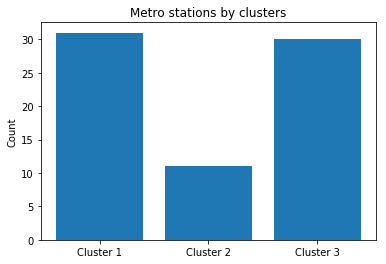

In [175]:
import matplotlib.pyplot as plt
objects = ('Cluster 1', 'Cluster 2', 'Cluster 3')
performance = [spb_merged[spb_merged['Cluster Labels'] == 0].shape[0],
               spb_merged[spb_merged['Cluster Labels'] == 1].shape[0],
               spb_merged[spb_merged['Cluster Labels'] == 2].shape[0]]

plt.bar(objects, performance)
plt.ylabel('Count')
plt.title('Metro stations by clusters')

plt.show()

In [176]:
spb_merged[spb_merged['Cluster Labels'] == 0]['Neighborhood'].unique()

array(['Ligovsky Prospekt', 'Narvskaya', 'Moskovskiye Vorota',
       'Moskovskaya', 'Obukhovo', 'Zvenigorodskaya', 'Lomonosovskaya',
       'Prospect Prosvesheniya', 'Lesnaya', 'Shushary', 'Park Pobedy',
       'Sportivnaya', 'Tekhnologichesky Institut', 'Novokrestovskaya',
       'Prospekt Slavy', 'Pionerskaya', 'Yelizarovskaya', 'Vyborgskaya',
       'Volkovskaya', 'Politekhnicheskaya', 'Bukharestskaya',
       'Chernyshevskaya', 'Ploshchad Lenina', 'Chkalovskaya',
       'Ploshchad Vosstaniya', 'Ulitsa Dybenko', 'Udelnaya',
       'Elektrosila', 'Chyornaya Rechka', 'Novocherkasskaya'],
      dtype=object)

## Results

Saint Petersburg metro stations were divided into 3 clusters:
-	Cluster 1 - the low density of gyms (red)
-	Cluster 2 - the average density of gyms (blue)
-	Cluster 3 - the high density of gyms (green)

## Conclusion 
We recommend that investors invest in the development of a network of fitness clubs (if they are confident in their business model). There is a shortage of gyms in the city and with growing demand, the investment should pay off. 
 The number of stations for initial launch exceeds the required seven stations. Full list of stations (marked in red on the map): 
Ligovsky Prospekt, Narvskaya, Moskovskiye Vorota,  Moskovskaya, Obukhovo, Zvenigorodskaya, Lomonosovskaya, Prospect Prosvesheniya, Lesnaya, Shushary, Park Pobedy, Sportivnaya, Tekhnologichesky Institut, Novokrestovskaya, Prospekt Slavy, Pionerskaya, Yelizarovskaya, Vyborgskaya, Volkovskaya, Politekhnicheskaya, Bukharestskaya,  Chernyshevskaya, Ploshchad Lenina, Chkalovskaya, Ploshchad Vosstaniya, Ulitsa Dybenko, Udelnaya, Elektrosila, Chyornaya Rechka, Novocherkasskaya.
